In [5]:
# 核心数据处理模块
import numpy as np  # 用于数值计算的基础模块
import pandas as pd  # 用于表格型数据处理与分析的模块

# 统计分析模块
import scipy.stats as stats  # 提供统计分布、假设检验等功能

# 时间处理模块
from datetime import datetime  # 用于时间日期的创建与处理

# 统计建模模块
import statsmodels.formula.api as smf  # 用于普通最小二乘（OLS）回归等统计建模

# 绘图相关模块
from matplotlib import style  # 用于设置绘图样式
import matplotlib.pyplot as plt  # 绘图核心模块
import matplotlib.dates as mdates  # 处理绘图中的日期格式

# 绘图字体配置（支持中文显示）
from matplotlib.font_manager import FontProperties
# 中文/西文字体配置示例（按需取消注释）
# import matplotlib as mpl
# mpl.rcParams['font.sans-serif'] = ['SimHei']  # 中文显示字体
# plt.rcParams['font.family'] = 'Times New Roman'  # 西文字体

# Jupyter Notebook 绘图与输出配置
%matplotlib inline  
# 在Notebook中嵌入绘图（注释移到下一行）
%config InlineBackend.figure_format = 'svg'  # 单独一行写魔法命令
# 输出矢量图（提升清晰度）（注释移到下一行）

# 配置Jupyter输出行为：显示每个代码块的所有运行结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'



In [6]:
data = pd.read_csv(r'C:\Users\冤种千斤\Desktop\代码\第四次作业\000001.csv')
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'], ascending=True)#显示图表

,Preclose,Open,Highest,Lowest,Close
Day,,,,,
1990-12-19,,96.050,99.980,95.790,99.980
1990-12-20,99.98,104.300,104.390,99.980,104.390
1990-12-21,104.39,109.070,109.130,103.730,109.130
1990-12-24,109.13,113.570,114.550,109.130,114.550
1990-12-25,114.55,120.090,120.250,114.550,120.250
...,...,...,...,...,...
2025-08-25,3825.759,3848.163,3883.562,3839.972,3883.562
2025-08-26,3883.562,3871.471,3888.599,3859.758,3868.382
2025-08-27,3868.382,3869.612,3887.198,3800.350,3800.350


In [ ]:
# 筛选1995-01至2025-08的时间范围数据
data_new = data['1995-01':'2025-08'].copy()

# 将"Close"（收盘价）列转为数值类型
data_new['Close'] = pd.to_numeric(data_new['Close'])
# 将"Preclose"（前收盘价）列转为数值类型
data_new['Preclose'] = pd.to_numeric(data_new['Preclose'])  

# 计算000001上证指数的原始日收益率（公式：当日收盘价/前收盘价 - 1）
data_new['Raw_return'] = data_new['Close'] / data_new['Preclose'] - 1

# 查看处理后的数据集
data_new

,Preclose,Open,Highest,Lowest,Close,Raw_return
Day,,,,,,
1995-01-03,647.870,637.720,647.710,630.530,639.880,-0.012333
1995-01-04,639.880,641.900,655.510,638.860,653.810,0.021770
1995-01-05,653.810,655.380,657.520,645.810,646.890,-0.010584
1995-01-06,646.890,642.750,643.890,636.330,640.760,-0.009476
1995-01-09,640.760,637.520,637.550,625.040,626.000,-0.023035
...,...,...,...,...,...,...
2025-08-25,3825.759,3848.163,3883.562,3839.972,3883.562,0.015109
2025-08-26,3883.562,3871.471,3888.599,3859.758,3868.382,-0.003909
2025-08-27,3868.382,3869.612,3887.198,3800.350,3800.350,-0.017587


In [9]:
Month_data = data_new.resample('M')['Raw_return'].apply(lambda x: (1+x).prod()-1).to_frame(name = 'Ret')
Month_data

,Ret
Day,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2025-04-30,-0.017002
2025-05-31,0.020877
2025-06-30,0.028959


In [ ]:
# 按月度重采样，计算上证指数的月度收益率
Month_data = data_new.resample('M')['Raw_return'].apply(
    lambda x: np.prod(1 + x) - 1  # 利用np.prod计算连乘，等价于(1+x1)*(1+x2)*...*(1+xn) - 1
).to_frame(name='Ret')  # 将结果转为DataFrame，列命名为'Ret'（代表收益率）

Month_data.index.name = 'month'  # 将时间索引的名称设为'month'，使结果更易读

Month_data  # 查看最终的月度收益率数据

,Ret
month,
1995-01-31,-0.131631
1995-02-28,-0.023694
1995-03-31,0.177803
1995-04-30,-0.103552
1995-05-31,0.207922
...,...
2025-04-30,-0.017002
2025-05-31,0.020877
2025-06-30,0.028959


In [12]:
Quarter_data = data_new.resample('Q')['Raw_return'].apply(lambda x: np.prod(1+x)-1).to_frame(name = 'Ret')
Quarter_data.index.name = 'Q'
Quarter_data

,Ret
Q,
1995-03-31,-0.001466
1995-06-30,-0.025258
1995-09-30,0.145660
1995-12-31,-0.231358
1996-03-31,0.001981
...,...
2024-09-30,0.124383
2024-12-31,0.004575
2025-03-31,-0.004779


In [13]:

Year_data = data_new.resample('Y')['Raw_return'].apply(
    lambda x: np.prod(1 + x) - 1  # 年度收益率计算逻辑：(1+每日收益率)连乘后减1，得到全年累计收益率
).to_frame(name='Ret')  # 转换为DataFrame，列名'Ret'对应“收益率”

Year_data.index.name = 'year'  # 将时间索引命名为'year'，使结果更直观易读

Year_data  # 查看最终的年度收益率数据

,Ret
year,
1995-12-31,-0.142899
1996-12-31,0.651425
1997-12-31,0.302153
1998-12-31,-0.039695
1999-12-31,0.191750
2000-12-31,0.517277
2001-12-31,-0.206180
2002-12-31,-0.175167
2003-12-31,0.102670


In [15]:

def summarize_returns(series):
    # 清洗数据：移除缺失值（避免统计计算报错）
    clean_series = series.dropna()
    
    # 计算各类描述性统计指标
    return pd.Series({
        '样本数': clean_series.count(),  # 有效数据的观测数量
        '均值': clean_series.mean(),     # 收益率的平均值
        '中位数': clean_series.median(), # 收益率的中间位置值（抗极端值）
        '标准差': clean_series.std(),    # 收益率的波动程度（风险指标）
        '方差': clean_series.var(),      # 标准差的平方
        '最小值': clean_series.min(),    # 收益率的最小值（最大亏损）
        '25%分位数': clean_series.quantile(0.25),  # 低于该值的样本占25%
        '50%分位数': clean_series.quantile(0.5),   # 即中位数
        '75%分位数': clean_series.quantile(0.75),  # 低于该值的样本占75%
        '最大值': clean_series.max(),    # 收益率的最大值（最大盈利）
        '正收益比例': (clean_series > 0).mean(),  # 收益率为正的样本占比
        '偏度': clean_series.skew(),     # 收益率分布的偏斜程度（正偏/负偏）
        '峰度': clean_series.kurt()      # 收益率分布的陡峭程度（厚尾/薄尾）
    })

# 指定：收益率的统计周期与数据范围
# 说明：提取日/月/年维度的收益率序列（聚焦2000年后数据）
return_periods = {
    '日收益率': data_new.loc['2000-01':'2025-08', 'Raw_return'],  # 2000.01-2025.08的日收益率
    '月收益率': Month_data.loc['2000-01':'2025-08', 'Ret'],       # 对应周期的月收益率
    '年收益率': Year_data.loc['2000':'2025', 'Ret']              # 2000-2025的年收益率
}
# 生成：多周期收益率的统计汇总表
# 按周期计算统计指标，并转置为“周期行、指标列”的表格（更易读）
returns_summary = pd.DataFrame({
    name: summarize_returns(series) 
    for name, series in return_periods.items()
}).T
# 格式化：统一统计结果的展示样式
# 正收益比例转百分比格式，并重命名列
returns_summary['正收益比例'] = returns_summary['正收益比例'].mul(100)
returns_summary.rename(columns={'正收益比例': '正收益比例(%)'}, inplace=True)

# 统一各指标的小数位数（样本数为整数，其余指标按业务习惯保留小数）
returns_summary = returns_summary.round({
    '样本数': 0,
    '均值': 5,
    '中位数': 5,
    '标准差': 5,
    '方差': 7,
    '最小值': 5,
    '25%分位数': 5,
    '50%分位数': 5,
    '75%分位数': 5,
    '最大值': 5,
    '正收益比例(%)': 2,
    '偏度': 3,
    '峰度': 3
})

# 样本数是计数，转换为整数类型
returns_summary['样本数'] = returns_summary['样本数'].astype(int)
returns_summary

,样本数,均值,中位数,标准差,方差,最小值,25%分位数,50%分位数,75%分位数,最大值,正收益比例(%),偏度,峰度
日收益率,6219,0.00027,0.00051,0.01462,0.000214,-0.08841,-0.00615,0.00051,0.00700,0.09857,52.68,-0.212,5.631
月收益率,308,0.00582,0.00457,0.06979,0.004870,-0.24631,-0.03590,0.00457,0.04199,0.27446,54.22,-0.055,1.991
年收益率,26,0.10927,0.03985,0.41714,0.174006,-0.65394,-0.14922,0.03985,0.14793,1.30433,53.85,1.284,2.094


In [16]:
round(data_new['2000-01':'2025-08']['Raw_return'].mean(),7)

0.0002741

In [17]:
np.mean(data_new['2007-09':'2025-08']['Raw_return'])

3.729417146987756e-05

In [19]:

# 计算并打印：日度平均收益率（2000-01至2025-08）
# 提取指定区间的日收益率，计算均值后转百分比
daily_mean_ret = data_new.loc['2000-01':'2025-08', 'Raw_return'].mean() * 100
print(f"中国股票市场日度平均收益率为：{daily_mean_ret:.2f}%")
# 计算并打印：月度平均收益率（2000-01至2025-08）
# 提取指定区间的月收益率，计算均值后转百分比（保留4位小数）
monthly_mean_ret = Month_data.loc['2000-01':'2025-08', 'Ret'].mean() * 100
print(f"中国股票市场月度平均收益率为：{monthly_mean_ret:.4f}%")
# 计算并打印：年度平均收益率（2000至2025）
# 提取指定区间的年收益率，计算均值后转百分比（保留4位小数）
yearly_mean_ret = Year_data.loc['2000':'2025', 'Ret'].mean() * 100
print(f"中国股票市场年度平均收益率为：{yearly_mean_ret:.4f}%")
# 手动验证：日度收益率均值（原理：总和 ÷ 样本数）
# 提取2000-01至2024-09的日收益率，手动计算均值（与前面的daily_mean_ret逻辑一致）
daily_ret_subset = data_new.loc['2000-01':'2024-09', 'Raw_return']
manual_daily_mean = (daily_ret_subset.sum() / len(daily_ret_subset)) * 100
print(f"手动验证：日度平均收益率为：{manual_daily_mean:.2f}%")

中国股票市场日度平均收益率为：0.03%
中国股票市场月度平均收益率为：0.5821%
中国股票市场年度平均收益率为：10.9271%
手动验证：日度平均收益率为：0.03%


In [20]:
data_new['1999-01':'2025-08']['Raw_return'].describe()

count    6458.000000
mean        0.000297
std         0.014748
min        -0.088407
25%        -0.006318
50%         0.000504
75%         0.007043
max         0.098568
Name: Raw_return, dtype: float64

In [21]:

# 1. 统计日收益率的样本规模与正收益占比
# 计算1995-01至2024-09期间的日收益率样本总数
total_daily_samples = len(data_new['1995-01':'2024-09'])
print(f"1995-01至2024-09的日收益率样本总数：{total_daily_samples}")


# 计算该期间内“日收益率>0”的样本数量（即上涨天数）
positive_return_days = len(data_new[data_new["Raw_return"] > 0])
print(f"日收益率为正的天数（上涨天数）：{positive_return_days}")


# 计算正收益天数的占比（反映上涨概率）
positive_return_ratio = positive_return_days / total_daily_samples
print(f"日收益率为正的天数占比：{positive_return_ratio:.4f}")
# 2. 计算日收益率的十分位数（金融中常用于收益分组分析）
from statistics import quantiles  # 导入分位数计算工具

# 计算1995-01至2025-08日收益率的“十分位数”（将数据拆分为10等份）
# - n=10：指定拆分为10份（即十分位数）
# - method='exclusive'：采用“不包含端点”的计算方法（适配连续型收益数据的分布分析）
daily_ret_deciles_excl = quantiles(
    data_new['1995-01':'2025-08']['Raw_return'],
    n=10,
    method='exclusive'  # 修正原代码的拼写错误：methods → method
)
print("\n1995-01至2025-08日收益率的十分位数（exclusive方法）：")
print(daily_ret_deciles_excl)


# 金融场景补充：分位数（5分位/10分位）常用于构建“收益分组策略”（如筛选高/低收益区间）
# 采用“包含端点”的计算方法（适配离散型数据的分箱统计）
daily_ret_deciles_incl = quantiles(
    data_new['1995-01':'2024-09']['Raw_return'],
    n=10,
    method='inclusive'  # 修正原代码的拼写错误：methods → method
)
print("\n1995-01至2024-09日收益率的十分位数（inclusive方法）：")
print(daily_ret_deciles_incl)

1995-01至2024-09的日收益率样本总数：7223
日收益率为正的天数（上涨天数）：3903
日收益率为正的天数占比：0.5404

1995-01至2025-08日收益率的十分位数（exclusive方法）：
[-0.016149825200764644, -0.008725465267893506, -0.004824058860378355, -0.001823562879049323, 0.000496269119653947, 0.0028404410444615724, 0.005705730958616373, 0.009680619902095611, 0.016938708022350025]

1995-01至2024-09日收益率的十分位数（inclusive方法）：
[-0.016273486796843283, -0.008904480681335824, -0.0049105335359804995, -0.0019112410821794379, 0.0004683483640481878, 0.0028484509548271308, 0.005764948233341815, 0.009789313259894784, 0.017182938215153553]


In [23]:
max(Month_data['2012-01':'2025-08']['Ret'])

0.2056924751382856

In [24]:
min(Month_data['2008-01':'2025-08']['Ret'])

-0.2463139446677537

In [25]:
quantiles(Month_data['1995-01':'2025-08']['Ret'], n = 10, method='exclusive')

[-0.07275859939933171,
 -0.04791044569180978,
 -0.026743591620732254,
 -0.007438510711914969,
 0.004471851221674594,
 0.020382622493721136,
 0.03630346419175008,
 0.05424194628329713,
 0.10003790772865565]

In [26]:
import statistics
help(statistics.quantiles)

Help on function quantiles in module statistics:

quantiles(data, *, n=4, method='exclusive')
    Divide *data* into *n* continuous intervals with equal probability.
    
    Returns a list of (n - 1) cut points separating the intervals.
    
    Set *n* to 4 for quartiles (the default).  Set *n* to 10 for deciles.
    Set *n* to 100 for percentiles which gives the 99 cuts points that
    separate *data* in to 100 equal sized groups.
    
    The *data* can be any iterable containing sample.
    The cut points are linearly interpolated between data points.
    
    If *method* is set to *inclusive*, *data* is treated as population
    data.  The minimum value is treated as the 0th percentile and the
    maximum value is treated as the 100th percentile.



In [27]:
# 示例：演示四分位数的两种计算方法（n=4代表拆分为4等份，即四分位数）
# 构造示例数据
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# 方法1：exclusive（不包含端点）计算四分位数
# 逻辑：将数据视为连续分布，分位数位于数据点之间
q_excl = statistics.quantiles(data, n=4, method='exclusive')  # 修正原代码：methods→method
print("四分位数（exclusive方法）：", q_excl)
# 方法2：inclusive（包含端点）计算四分位数
# 逻辑：将数据视为离散点，分位数基于数据点的位置计算
q_incl = statistics.quantiles(data, n=4, method='inclusive')  # 修正原代码：methods→method
print("四分位数（inclusive方法）：", q_incl)
# 月度收益率的描述性统计（快速概览分布特征）
# 提取2000-01至2025-08的月度收益率，生成统计摘要
monthly_ret_summary = Month_data['2000-01':'2025-08']['Ret'].describe()
print("\n2000-01至2025-08月度收益率的描述性统计：")
print(monthly_ret_summary)
# 统计项说明：
# count：有效样本数 | mean：平均收益率 | std：收益率波动（风险）
# min：最大月度亏损 | 25%/50%/75%：分位数 | max：最大月度盈利
# 月度收益率的十分位数（拆分10等份，用于收益分组/风险分层）
monthly_ret_deciles = statistics.quantiles(
    Month_data['Ret'],  # 月度收益率序列
    n=10,  # 拆分为10等份（十分位数）
    method='inclusive'
)
print("\n月度收益率的十分位数（inclusive方法）：")
print(monthly_ret_deciles)

四分位数（exclusive方法）： [2.75, 5.5, 8.25]
四分位数（inclusive方法）： [3.25, 5.5, 7.75]

2000-01至2025-08月度收益率的描述性统计：
count    308.000000
mean       0.005821
std        0.069785
min       -0.246314
25%       -0.035898
50%        0.004569
75%        0.041993
max        0.274464
Name: Ret, dtype: float64

月度收益率的十分位数（inclusive方法）：
[-0.0709964521333589, -0.047737015530115404, -0.026630590375295526, -0.007411841595713531, 0.004471851221674594, 0.02021786355713373, 0.03625761917881416, 0.05352850908377551, 0.09697370519393292]


In [28]:
seq = np.linspace(0,1,11)
seq

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [29]:
# 公式说明：Rt+1 = a + b*VARt
# 含义：检验“当期风险（VARt，收益率方差）”对“下一期收益（Rt+1）”的解释力（金融中风险收益权衡的经典回归模型）
# 步骤1：提取基础数据（避免重复切片）
# 提取2000-01至2025-08的日收益率序列（后续统计的核心数据）
daily_ret_2000_2025 = data_new['2000-01':'2025-08']['Raw_return']
# 步骤2：计算日收益率的方差（风险指标）
# 计算【总体方差】（默认除以样本总数n，适用于“数据为完整总体”的场景）
daily_ret_pop_var = np.var(daily_ret_2000_2025)
print(f"2000-01至2025-08日收益率的总体方差（风险）：{daily_ret_pop_var}")
# 手动计算【样本方差】（除以n-1，适用于“用样本推断总体”的场景）
daily_ret_mean = np.mean(daily_ret_2000_2025)  # 日收益率的均值
daily_ret_sample_var = sum((daily_ret_2000_2025 - daily_ret_mean) ** 2) / (len(daily_ret_2000_2025) - 1)
print(f"2000-01至2025-08日收益率的样本方差（风险）：{daily_ret_sample_var}")
# 步骤3：计算日收益率的标准差（更直观的风险指标）
# 计算【总体标准差】（方差的平方根，风险的常用表示形式）
daily_ret_pop_std = np.std(daily_ret_2000_2025)
print(f"2000-01至2025-08日收益率的总体标准差：{daily_ret_pop_std}")
# 验证：总体方差的平方根 = 总体标准差
daily_ret_std_from_var = np.sqrt(daily_ret_pop_var)
print(f"通过总体方差开方得到的标准差（验证）：{daily_ret_std_from_var}")
# 步骤4：计算其他时间范围的收益率标准差
# 提取2000-01至2024-09的日收益率序列
daily_ret_2000_2024 = data_new['2000-01':'2024-09']['Raw_return']
# 借助math库计算该区间的总体标准差
from math import sqrt
daily_ret_std_2000_2024 = sqrt(np.var(daily_ret_2000_2024))
print(f"2000-01至2024-09日收益率的总体标准差：{daily_ret_std_2000_2024}")

2000-01至2025-08日收益率的总体方差（风险）：0.00021377999633570119
2000-01至2025-08日收益率的样本方差（风险）：0.00021381437716496072
2000-01至2025-08日收益率的总体标准差：0.014621217334261234
通过总体方差开方得到的标准差（验证）：0.014621217334261234
2000-01至2024-09日收益率的总体标准差：0.014732982591047728


In [31]:
monthly_var = data_new.resample('M')['Raw_return'].var().to_frame(name = 'variance')
monthly_var.index.name = 'month'
monthly_var

,variance
month,
1995-01-31,0.000260
1995-02-28,0.001130
1995-03-31,0.000551
1995-04-30,0.000407
1995-05-31,0.006924
...,...
2025-04-30,0.000304
2025-05-31,0.000032
2025-06-30,0.000030


In [33]:
monthly_var = data_new.resample('M')['Raw_return'].apply(lambda x: np.sum(x ** 2)).to_frame(name = 'variance')
monthly_var.index.name = 'month'
monthly_var

,variance
month,
1995-01-31,0.005695
1995-02-28,0.018086
1995-03-31,0.013378
1995-04-30,0.008281
1995-05-31,0.148387
...,...
2025-04-30,0.006097
2025-05-31,0.000602
2025-06-30,0.000609


In [34]:
len(data_new[data_new["Raw_return"] > 0])/len(data_new)

0.5242444593687038

In [35]:
len(Month_data['1995-01':'2025-08'][Month_data["Ret"] > 0])/len(Month_data['1995-01':'2025-08'])

0.532608695652174

Text(0.5, 0.98, '偏度分布示例')

<AxesSubplot:ylabel='Count'>

Text(0.5, 1.0, '负偏度（左偏）\n偏度值 = -0.88')

Text(0.5, 0, '数值')

Text(0, 0.5, '频数')

Text(0.05, 0.9, '均值 < 中位数')

<AxesSubplot:ylabel='Count'>

Text(0.5, 1.0, '零偏度（对称）\n偏度值 = 0.02')

Text(0.5, 0, '数值')

Text(0, 0.5, '')

Text(0.05, 0.9, '均值 = 中位数')

<AxesSubplot:ylabel='Count'>

Text(0.5, 1.0, '正偏度（右偏）\n偏度值 = 0.79')

Text(0.5, 0, '数值')

Text(0, 0.5, '')

Text(0.05, 0.9, '均值 > 中位数')

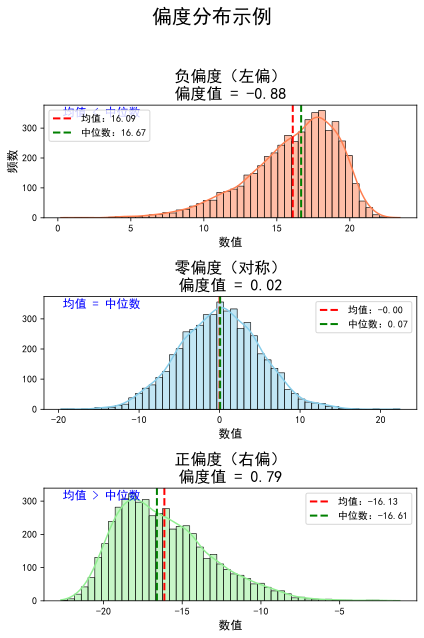

In [ ]:

# 1. 导入依赖库
import numpy as np                  # 数值计算核心库
import matplotlib.pyplot as plt     # 绘图基础库
from scipy.stats import skewnorm, skew  # 偏态分布生成、偏度计算工具
import seaborn as sns               # 美化绘图的工具库
# 2. 配置中文显示（适配Windows/macOS系统）
try:
    # 适配macOS：默认字体“PingFang SC”；适配Windows：替换为“SimHei”
    plt.rcParams['font.sans-serif'] = ['PingFang SC', 'SimHei', 'Arial Unicode MS']
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号“-”显示为方块的问题
except Exception as e:
    print(f"中文显示配置失败，请检查字体是否安装：{e}")
# 3. 生成不同偏度的数据集
np.random.seed(42)  # 设置随机种子，保证结果可复现
n_samples = 5000    # 样本数量（越大分布越稳定）

# （1）负偏度数据（左偏：长尾朝左，均值<中位数）
# skewnorm参数说明：a=形状参数（a<0→负偏）；loc=位置（均值中心）；scale=尺度（标准差）
data_neg = skewnorm.rvs(a=-5, loc=20, scale=5, size=n_samples)
skew_neg = skew(data_neg)  # 计算实际偏度值

# （2）零偏度数据（对称分布，近似正态：均值=中位数）
data_zero = skewnorm.rvs(a=0, loc=0, scale=5, size=n_samples)  # a=0时为正态分布
skew_zero = skew(data_zero)

# （3）正偏度数据（右偏：长尾朝右，均值>中位数）
data_pos = skewnorm.rvs(a=5, loc=-20, scale=5, size=n_samples)  # a>0→正偏
skew_pos = skew(data_pos)

# 4. 可视化不同偏度的分布（3行1列子图）
fig, axes = plt.subplots(3, 1, figsize=(6, 9))  # 创建3行1列的绘图区域
fig.suptitle('偏度分布示例', fontsize=20)  # 总标题


# （1）绘制负偏度分布图
sns.histplot(data_neg, kde=True, ax=axes[0], color='coral', bins=50)  # 直方图+核密度估计
axes[0].set_title(f'负偏度（左偏）\n偏度值 = {skew_neg:.2f}', fontsize=16)
axes[0].set_xlabel('数值', fontsize=12)
axes[0].set_ylabel('频数', fontsize=12)
# 标注均值（红）、中位数（绿），直观展示偏度对二者的影响
mean_neg = np.mean(data_neg)
median_neg = np.median(data_neg)
axes[0].axvline(mean_neg, color='red', linestyle='--', linewidth=2, label=f'均值：{mean_neg:.2f}')
axes[0].axvline(median_neg, color='green', linestyle='--', linewidth=2, label=f'中位数：{median_neg:.2f}')
axes[0].legend()
axes[0].text(0.05, 0.9, '均值 < 中位数', transform=axes[0].transAxes, fontsize=12, color='blue')


# （2）绘制零偏度分布图
sns.histplot(data_zero, kde=True, ax=axes[1], color='skyblue', bins=50)
axes[1].set_title(f'零偏度（对称）\n偏度值 = {skew_zero:.2f}', fontsize=16)
axes[1].set_xlabel('数值', fontsize=12)
axes[1].set_ylabel('')  # 隐藏中间图y轴标签，避免排版拥挤
# 标注均值、中位数
mean_zero = np.mean(data_zero)
median_zero = np.median(data_zero)
axes[1].axvline(mean_zero, color='red', linestyle='--', linewidth=2, label=f'均值：{mean_zero:.2f}')
axes[1].axvline(median_zero, color='green', linestyle='--', linewidth=2, label=f'中位数：{median_zero:.2f}')
axes[1].legend()
axes[1].text(0.05, 0.9, '均值 = 中位数', transform=axes[1].transAxes, fontsize=12, color='blue')


# （3）绘制正偏度分布图
sns.histplot(data_pos, kde=True, ax=axes[2], color='lightgreen', bins=50)
axes[2].set_title(f'正偏度（右偏）\n偏度值 = {skew_pos:.2f}', fontsize=16)
axes[2].set_xlabel('数值', fontsize=12)
axes[2].set_ylabel('')
# 标注均值、中位数
mean_pos = np.mean(data_pos)
median_pos = np.median(data_pos)
axes[2].axvline(mean_pos, color='red', linestyle='--', linewidth=2, label=f'均值：{mean_pos:.2f}')
axes[2].axvline(median_pos, color='green', linestyle='--', linewidth=2, label=f'中位数：{median_pos:.2f}')
axes[2].legend()
axes[2].text(0.05, 0.9, '均值 > 中位数', transform=axes[2].transAxes, fontsize=12, color='blue')


# --------------------------
# 5. 调整布局并显示图像
# --------------------------
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 调整布局，为总标题预留空间
plt.show()  # 显示绘图结果

Text(0.5, 0.98, '峰度分布示例')

<AxesSubplot:ylabel='Count'>

Text(0.5, 1.0, '尖峰/厚尾（Leptokurtic）\n原始峰度值 = 6.23（> 3）')

Text(0.5, 0, '数值')

Text(0, 0.5, '频数')

(-6.0, 6.0)

<AxesSubplot:ylabel='Count'>

Text(0.5, 1.0, '常峰（Mesokurtic）\n原始峰度值 = 3.06（≈ 3）')

Text(0.5, 0, '数值')

Text(0, 0.5, '')

(-6.0, 6.0)

<AxesSubplot:ylabel='Count'>

Text(0.5, 1.0, '低阔峰/瘦尾（Platykurtic）\n原始峰度值 = 1.81（< 3）')

Text(0.5, 0, '数值')

Text(0, 0.5, '')

(-6.0, 6.0)

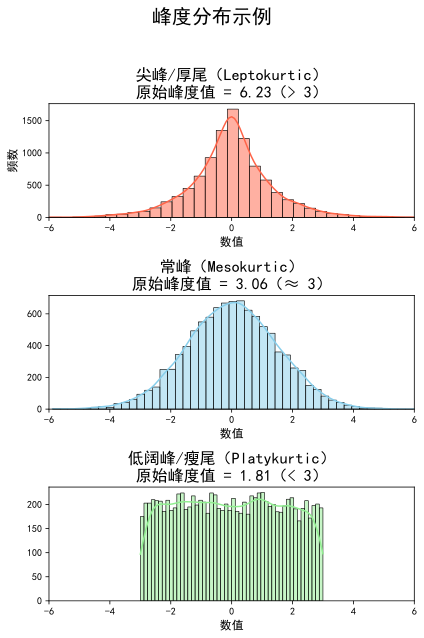

In [38]:

# 1. 导入依赖库
import numpy as np                  # 数值计算核心库
import matplotlib.pyplot as plt     # 绘图基础库
from scipy.stats import kurtosis, norm, laplace, uniform  # 峰度计算、各类分布生成工具
import seaborn as sns               # 美化绘图的工具库
# 2. 配置中文显示（适配Windows/macOS系统）
try:
    # 适配macOS（PingFang SC）、Windows（SimHei）及通用字体
    plt.rcParams['font.sans-serif'] = ['PingFang SC', 'SimHei', 'Arial Unicode MS']
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号“-”显示为方块的问题
except Exception as e:
    print(f"中文显示配置失败，请检查字体是否安装：{e}")
# 3. 生成不同峰度的数据集
np.random.seed(42)  # 设置随机种子，保证结果可复现
n_samples = 10000   # 样本数量（越大分布特征越稳定）
# （1）尖峰/厚尾数据（Leptokurtic）
# 拉普拉斯分布：典型的尖峰厚尾分布（尾部概率高于正态分布）
# 参数说明：loc=位置（均值）；scale=尺度（类似标准差）
data_lepto = laplace.rvs(loc=0, scale=1, size=n_samples)
# fisher=False：计算“原始峰度”（正态分布的原始峰度为3；尖峰分布>3）
kurt_lepto = kurtosis(data_lepto, fisher=False)
# （2）常峰数据（Mesokurtic）
# 正态分布：典型的常峰分布（峰度基准）
data_meso = norm.rvs(loc=0, scale=1.5, size=n_samples)  # 调整scale让视觉效果更清晰
kurt_meso = kurtosis(data_meso, fisher=False)  # 正态分布原始峰度≈3
# （3）低阔峰/瘦尾数据（Platykurtic）
# 均匀分布：典型的低阔峰分布（尾部概率低于正态分布）
# 参数说明：loc=-3（起始值），scale=6（范围长度）→ 数据范围为[-3, 3]
data_platy = uniform.rvs(loc=-3, scale=6, size=n_samples)
kurt_platy = kurtosis(data_platy, fisher=False)  # 均匀分布原始峰度<3
# --------------------------
# 4. 可视化不同峰度的分布（3行1列子图，统一范围便于对比）
# --------------------------
fig, axes = plt.subplots(3, 1, figsize=(6, 9))  # 创建3行1列的绘图区域
fig.suptitle('峰度分布示例', fontsize=20)  # 总标题
common_xlim = (-6, 6)  # 统一x轴范围，让不同分布的峰度特征更易对比
# （1）绘制尖峰/厚尾分布图
sns.histplot(data_lepto, kde=True, ax=axes[0], color='tomato', bins=50)
axes[0].set_title(
    f'尖峰/厚尾（Leptokurtic）\n原始峰度值 = {kurt_lepto:.2f}（> 3）',
    fontsize=16
)
axes[0].set_xlabel('数值', fontsize=12)
axes[0].set_ylabel('频数', fontsize=12)
axes[0].set_xlim(common_xlim)  # 应用统一x轴范围


# （2）绘制常峰分布图
sns.histplot(data_meso, kde=True, ax=axes[1], color='skyblue', bins=50)
axes[1].set_title(
    f'常峰（Mesokurtic）\n原始峰度值 = {kurt_meso:.2f}（≈ 3）',
    fontsize=16
)
axes[1].set_xlabel('数值', fontsize=12)
axes[1].set_ylabel('')  # 隐藏中间图y轴标签，避免排版拥挤
axes[1].set_xlim(common_xlim)


# （3）绘制低阔峰/瘦尾分布图
sns.histplot(data_platy, kde=True, ax=axes[2], color='lightgreen', bins=50)
axes[2].set_title(
    f'低阔峰/瘦尾（Platykurtic）\n原始峰度值 = {kurt_platy:.2f}（< 3）',
    fontsize=16
)
axes[2].set_xlabel('数值', fontsize=12)
axes[2].set_ylabel('')
axes[2].set_xlim(common_xlim)


# --------------------------
# 5. 调整布局并显示图像
# --------------------------
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 调整布局，为总标题预留空间
plt.show()  # 显示绘图结果

In [46]:
from scipy import stats  # 导入scipy的stats模块，用于计算峰度

# Daily data
len(data_new['1995-01':'2025-08'])  # 计算该区间数据的长度
data_new['1995-01':'2025-08']['Raw_return'].skew()  # 计算日收益率的偏度
data_new['1995-01':'2025-08']['Raw_return'].kurt()  # 计算日收益率的Fisher峰度（Pandas默认）
stats.kurtosis(data_new['1995-01':'2025-08']['Raw_return'], fisher=False) - 3  # 原始峰度转Fisher峰度
stats.kurtosis(data_new['1995-01':'2025-08']['Raw_return'], fisher=True)  # 直接计算Fisher峰度

7445

0.6772796464034425

23.63802106137419

23.621343146464902

23.621343146464902

In [47]:
m = np.mean(data_new['1995-01':'2024-09']['Raw_return'])
l = len(data_new['1995-01':'2024-09']['Raw_return'])
sum(((data_new['1995-01':'2024-09']['Raw_return'] - m)/np.std(data_new['1995-01':'2024-09']['Raw_return']))**4) / l -3

23.455144815692655

In [48]:
data_new['1995-01':'2025-08']['Raw_return'].skew()
data_new['1995-01':'2025-08']['Raw_return'].kurt()

0.6772796464034425

23.63802106137419

In [49]:
# Monthly data
Month_data['1995-01':'2025-08']['Ret'].skew()
Month_data['1995-01':'2025-08']['Ret'].kurt()

0.3266812712820461

2.0120324549166306

In [50]:
# Quarterly data
Quarter_data['1995-01':'2024-09']['Ret'].skew()
Quarter_data['1995-01':'2024-09']['Ret'].kurt()

0.867502448571498

1.7137615374448099

'\n正态分布的“理论概率密度”与“实际样本分布”可视化\n步骤：生成随机数 → 计算理论密度 → 绘制曲线与直方图对比\n'

<Figure size 576x288 with 0 Axes>

(array([1.05170330e-05, 0.00000000e+00, 1.05170330e-05, 2.10340660e-05,
        3.15510990e-05, 5.25851650e-05, 5.25851650e-05, 4.20681320e-05,
        1.36721429e-04, 1.05170330e-04, 3.04993957e-04, 3.68096155e-04,
        4.62749452e-04, 6.31021980e-04, 1.02015220e-03, 1.38824836e-03,
        1.81944671e-03, 2.58719012e-03, 3.65992749e-03, 4.93248848e-03,
        6.84658849e-03, 8.35052420e-03, 1.10218506e-02, 1.39245517e-02,
        1.78053369e-02, 2.25695528e-02, 2.76808309e-02, 3.45694875e-02,
        4.35825848e-02, 5.10286441e-02, 6.14720579e-02, 7.47130025e-02,
        8.76910212e-02, 1.03508639e-01, 1.18348172e-01, 1.38099160e-01,
        1.58838749e-01, 1.81387268e-01, 2.03367867e-01, 2.24349348e-01,
        2.47118724e-01, 2.70824117e-01, 2.96412058e-01, 3.15437371e-01,
        3.33694940e-01, 3.48208446e-01, 3.68117189e-01, 3.78013717e-01,
        3.89414181e-01, 3.92432569e-01, 3.98606068e-01, 3.96092497e-01,
        3.96302838e-01, 3.83734983e-01, 3.76057549e-01, 3.618280

Text(0.5, 1.0, 'Normal Distribution: Theoretical vs Sample')

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Probability Density')

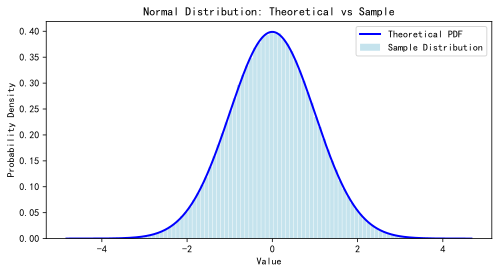

In [51]:
import numpy as np
import matplotlib.pyplot as plt

"""
正态分布的“理论概率密度”与“实际样本分布”可视化
步骤：生成随机数 → 计算理论密度 → 绘制曲线与直方图对比
"""

# ---------------------- 1. 定义正态分布概率密度函数 ----------------------
# 公式：f(x) = (1/(σ√(2π))) * e^(-(x-μ)²/(2σ²))
# 参数：x（自变量）、mu（均值）、sigma（标准差）
def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf


# ---------------------- 2. 生成正态分布随机样本 ----------------------
# 生成 100 万个「均值=0、标准差=1」的正态分布随机数
normal_samples = np.random.normal(loc=0, scale=1, size=1000000)


# ---------------------- 3. 构造绘图的 x 轴与理论密度 ----------------------
# x 轴范围：覆盖随机样本的「最小值→最大值」，步长 0.01（保证曲线连续性）
x = np.arange(min(normal_samples), max(normal_samples), 0.01)

# 计算「理论正态分布」的概率密度（基于样本的均值、标准差）
y_theoretical = normfun(x, mu=normal_samples.mean(), sigma=normal_samples.std())


# ---------------------- 4. 绘制“理论曲线”与“样本直方图” ----------------------
# 设置画布大小（宽 8 英寸，高 4 英寸）
plt.figure(figsize=(8, 4))

# 绘制「理论正态分布」的概率密度曲线
plt.plot(x, y_theoretical, color='blue', linewidth=2, label='Theoretical PDF')

# 绘制「实际样本」的概率密度直方图
# bins=100：将数据分成 100 个区间（柱形）；density=True：转换为“概率密度”（与理论曲线可比）
plt.hist(normal_samples, bins=100, rwidth=0.9, density=True, 
         color='lightblue', alpha=0.7, label='Sample Distribution')

# 设置图形标签与图例
plt.title('Normal Distribution: Theoretical vs Sample')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()  # 显示图例（区分理论曲线与样本分布）


# ---------------------- 5. 显示图形 ----------------------
plt.show()

# 补充说明：
# 理论正态分布的定义域是 (-∞, +∞)，但此处 x 仅截取「样本最小值→最大值」的范围，
# 因此图形中概率密度的积分（面积）近似为 1，能直观对比“理论形态”与“实际样本的分布形态”。

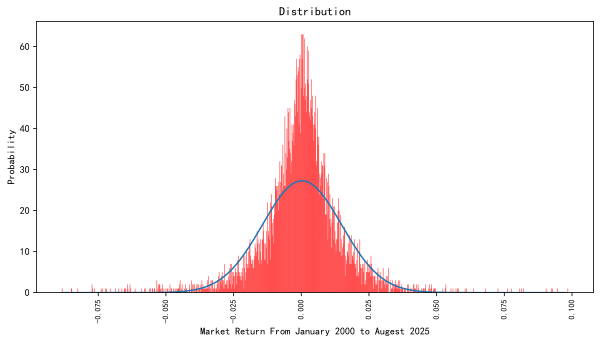

In [52]:
retmean = data_new['2000-01':'2025-08']['Raw_return'].mean()
retstd = data_new['2000-01':'2025-08']['Raw_return'].std()
retmin = data_new['2000-01':'2025-08']['Raw_return'].min()
retmax = data_new['2000-01':'2025-08']['Raw_return'].max()


def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu)**2) /
                 (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf


x = np.arange(retmin, retmax, 0.001) # 0.001 0.002 0.003 0.004.。。。 0.099 0.100  0.101
y = normfun(x, retmean, retstd)
fig = plt.figure(figsize=(10, 5))
plt.plot(x, y)

fig = plt.hist(data_new['2000-01':'2025-08']['Raw_return'], # index daily market excess return
               bins=1000,
               histtype='bar',
               color='r',
               alpha=0.9)
plt.xticks(rotation=90, fontsize=8) # x轴显示方法
plt.title('Distribution')
plt.xlabel('Market Return From January 2000 to Augest 2025')
plt.ylabel('Probability')
plt.show();

<Figure size 720x360 with 0 Axes>

(array([ 0.62344266,  0.        ,  0.        ,  0.62344266,  0.        ,
         0.62344266,  0.        ,  0.        ,  1.24688531,  0.        ,
         0.        ,  0.        ,  0.62344266,  0.        ,  0.        ,
         0.62344266,  0.        ,  0.        ,  0.        ,  0.62344266,
         0.62344266,  1.24688531,  0.        ,  0.62344266,  0.        ,
         0.        ,  0.        ,  0.62344266,  1.24688531,  1.24688531,
         1.24688531,  1.87032797,  2.49377063,  1.87032797,  0.62344266,
         3.74065594,  8.72819719,  5.61098391,  4.98754125,  4.3640986 ,
         3.74065594,  3.11721328,  4.98754125,  5.61098391,  4.3640986 ,
         6.23442656, 11.22196782,  8.10475453, 13.09229579,  2.49377063,
         7.48131188,  6.23442656,  6.85786922,  4.3640986 ,  7.48131188,
         4.98754125,  5.61098391,  4.98754125,  3.74065594,  3.74065594,
         1.87032797,  2.49377063,  3.11721328,  1.24688531,  0.62344266,
         1.24688531,  0.62344266,  1.24688531,  2.4

(array([-0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Distribution of Monthly Market Returns (2000-01 to 2025-08)')

Text(0.5, 0, 'Monthly Market Return')

Text(0, 0.5, 'Probability Density')

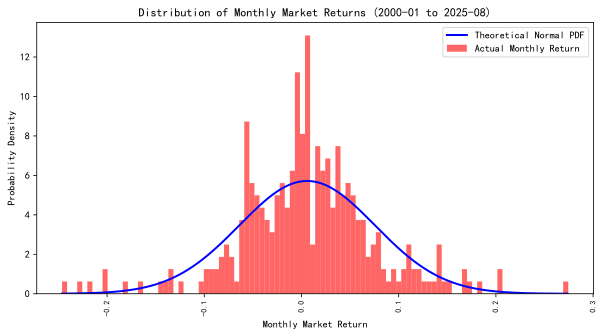

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 计算月度收益率的核心统计量 -
# 数据范围：2000-01至2025-08的月度收益率（Ret列）
monthly_ret = Month_data['2000-01':'2025-08']['Ret']
# 计算统计量：均值、标准差、最小值、最大值
ret_mean = monthly_ret.mean()    # 月度收益率均值
ret_std = monthly_ret.std()      # 月度收益率标准差（风险指标）
ret_min = monthly_ret.min()      # 月度收益率最小值（最大亏损）
ret_max = monthly_ret.max()      # 月度收益率最大值（最大盈利）
#  2. 定义正态分布概率密度函数 
# 功能：根据均值(mu)、标准差(sigma)，计算自变量x对应的正态分布概率密度
def normfun(x, mu, sigma):
    pdf = np.exp(-((x - mu) ** 2) / (2 * sigma ** 2)) / (sigma * np.sqrt(2 * np.pi))
    return pdf
#  3. 准备绘图数据与画布 
# x轴范围：覆盖月度收益率的最小→最大值，步长0.001（保证曲线平滑）
x = np.arange(ret_min, ret_max, 0.001)
# 计算“理论正态分布”的概率密度（基于月度收益率的均值、标准差）
y_theoretical = normfun(x, ret_mean, ret_std)
# 设置画布大小（宽10英寸，高5英寸）
plt.figure(figsize=(10, 5))
#  4. 绘制“理论曲线”与“实际收益率直方图” 
# 绘制理论正态分布曲线（蓝色，区分实际分布）
plt.plot(x, y_theoretical, color='blue', linewidth=2, label='Theoretical Normal PDF')
# 绘制实际月度收益率的概率密度直方图
# bins=100：分100个区间；density=True：转概率密度（与理论曲线可比）；alpha：透明度
plt.hist(
    monthly_ret,
    bins=100,
    histtype='bar',
    color='red',
    alpha=0.6,
    density=True,
    label='Actual Monthly Return'
)


# ---------------------- 5. 图形格式美化 ----------------------
plt.xticks(rotation=90, fontsize=8)  # x轴标签旋转90度，避免重叠
plt.title('Distribution of Monthly Market Returns (2000-01 to 2025-08)')  # 标题明确时间范围
plt.xlabel('Monthly Market Return')  # 修正原代码的拼写错误（xlabel→xlabel）
plt.ylabel('Probability Density')    # 标注“概率密度”（与density=True对应）
plt.legend()  # 显示图例，区分理论曲线与实际分布


# ---------------------- 6. 显示图形 ----------------------
plt.show()

In [54]:
from statsmodels.tsa.stattools import adfuller as ADF
import pandas as pd

# ---------------------- 封装ADF检验函数（避免重复代码） ----------------------
def adf_stationarity_test(series, series_label):
    """
    对时间序列进行ADF平稳性检验
    参数：
        series: 待检验的时间序列
        series_label: 序列名称（用于输出说明）
    输出：检验结果（ADF统计量、p值、临界值）及平稳性结论
    """
    # 执行ADF检验
    adf_result = ADF(series.dropna())  # 先移除缺失值，避免检验报错
    
    # 格式化输出检验结果
    print(f"===== {series_label}的ADF平稳性检验结果 =====")
    print(f"ADF统计量: {adf_result[0]:.4f}")
    print(f"p值: {adf_result[1]:.4f}")
    print("临界值（不同显著性水平）:")
    # 以更整洁的格式展示临界值
    critical_vals = pd.Series(adf_result[4], name="临界值")
    print(critical_vals.to_string())
    
    # 判断平稳性（原假设：序列非平稳；p<=0.05则拒绝原假设，认为序列平稳）
    if adf_result[1] <= 0.05:
        print(f"结论：p值（{adf_result[1]:.4f}）≤ 0.05，拒绝原假设，{series_label}是平稳序列。\n")
    else:
        print(f"结论：p值（{adf_result[1]:.4f}）> 0.05，无法拒绝原假设，{series_label}是非平稳序列。\n")


# ---------------------- 1. 对日收益率序列进行ADF检验 ----------------------
# 提取2000-01至2025-08的日收益率序列
daily_return_series = data_new['2000-01':'2025-08']['Raw_return']
# 调用检验函数
adf_stationarity_test(daily_return_series, "日收益率序列")


# ---------------------- 2. 对月度收益率序列进行ADF检验 ----------------------
# 提取2000-01至2024-09的月度收益率序列
monthly_return_series = Month_data['2000-01':'2024-09']['Ret']
# 调用检验函数
adf_stationarity_test(monthly_return_series, "月度收益率序列")

===== 日收益率序列的ADF平稳性检验结果 =====
ADF统计量: -12.4417
p值: 0.0000
临界值（不同显著性水平）:
1%    -3.431408
5%    -2.862007
10%   -2.567019
结论：p值（0.0000）≤ 0.05，拒绝原假设，日收益率序列是平稳序列。

===== 月度收益率序列的ADF平稳性检验结果 =====
ADF统计量: -6.0735
p值: 0.0000
临界值（不同显著性水平）:
1%    -3.453670
5%    -2.871808
10%   -2.572241
结论：p值（0.0000）≤ 0.05，拒绝原假设，月度收益率序列是平稳序列。



In [55]:
from statsmodels.tsa.stattools import adfuller as ADF
adf_result = ADF(Quarter_data['2000':'2025']['Ret'])

print('原始序列的ADF检验结果:')
print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')
print('Critical Values:')   
for key, value in adf_result[4].items():
    print(f'   {key}: {value:.4f}')
if adf_result[1] <= 0.05:
    print('结论: p-value小于0.05，拒绝原假设，序列是平稳的。')
else:
    print('结论: p-value大于0.05，未能拒绝原假设，序列是非平稳的。')


原始序列的ADF检验结果:
ADF Statistic: -5.6533
p-value: 0.0000
Critical Values:
   1%: -3.4989
   5%: -2.8915
   10%: -2.5828
结论: p-value小于0.05，拒绝原假设，序列是平稳的。


In [57]:
from statsmodels.tsa.stattools import adfuller as ADF

# 1. 提取待检验的日收益率序列（2000-01至2025-08）
daily_ret_series = data_new['2000-01':'2025-08']['Raw_return'].dropna()  # 移除缺失值，避免检验报错

# 2. 执行ADF平稳性检验
adf_result = ADF(daily_ret_series)

# 3. 格式化输出检验结果
print("===== 日收益率序列的ADF平稳性检验结果 =====")
print(f"ADF统计量: {adf_result[0]:.4f}")
print(f"p值: {adf_result[1]:.4f}")
print("临界值（不同显著性水平）:")
# 按1%/5%/10%的顺序整齐输出临界值
for sig_level, crit_val in adf_result[4].items():
    print(f"  {sig_level}: {crit_val:.4f}")

# 4. 输出平稳性结论（原假设：序列非平稳）
if adf_result[1] <= 0.05:
    print(f"结论：p值（{adf_result[1]:.4f}）≤ 0.05，拒绝“序列非平稳”的原假设，日收益率序列是平稳的。")
else:
    print(f"结论：p值（{adf_result[1]:.4f}）> 0.05，无法拒绝原假设，日收益率序列是非平稳的。")

===== 日收益率序列的ADF平稳性检验结果 =====
ADF统计量: -12.4417
p值: 0.0000
临界值（不同显著性水平）:
  1%: -3.4314
  5%: -2.8620
  10%: -2.5670
结论：p值（0.0000）≤ 0.05，拒绝“序列非平稳”的原假设，日收益率序列是平稳的。


In [58]:
from statsmodels.tsa.stattools import adfuller as ADF

# 1. 提取待检验的收盘价序列（2000-2025），并移除缺失值
close_price_series = data_new['2000':'2025']['Close'].dropna()

# 2. 执行ADF平稳性检验（原假设：序列非平稳）
adf_result = ADF(close_price_series)

# 3. 格式化输出检验结果
print("===== 收盘价序列的ADF平稳性检验结果 =====")
print(f"ADF统计量: {adf_result[0]:.4f}")
print(f"p值: {adf_result[1]:.4f}")
print("临界值（不同显著性水平）:")
# 整齐排版临界值（按1%/5%/10%顺序输出）
for sig_level, crit_val in adf_result[4].items():
    print(f"  {sig_level}: {crit_val:.4f}")

# 4. 输出平稳性结论（明确原假设的含义）
if adf_result[1] <= 0.05:
    print(f"结论：p值（{adf_result[1]:.4f}）≤ 0.05，拒绝“序列非平稳”的原假设，收盘价序列是平稳的。")
else:
    print(f"结论：p值（{adf_result[1]:.4f}）> 0.05，无法拒绝原假设，收盘价序列是非平稳的。")

===== 收盘价序列的ADF平稳性检验结果 =====
ADF统计量: -2.2358
p值: 0.1935
临界值（不同显著性水平）:
  1%: -3.4314
  5%: -2.8620
  10%: -2.5670
结论：p值（0.1935）> 0.05，无法拒绝原假设，收盘价序列是非平稳的。
